# Predict Aparatment Prices with Random Forest Regression

GOAL: Beat best Linear Model trained previously
- MAE: ~18600
- RMSE: ~23400

In [2]:
# Data Loading
import pickle

# Data Manipulation
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# RandomForest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
with open('data/cluj_prices_lm.pkl','rb') as f:
    df = pickle.load(f)

df.shape

(161, 11)

In [4]:
df.head()

,price_euro,rooms,size,bathrooms,terrace,pass_through,finished,height_pos,neighbourhood,year_built,zone
0,133425,2,53.0,1,1,False,not finished,0.17,Intre Lacuri,2024,other
1,168675,3,67.0,2,2,False,not finished,0.17,Intre Lacuri,2024,other
2,177825,3,69.0,2,2,False,not finished,0.17,Intre Lacuri,2024,other
3,168675,3,67.0,2,2,False,not finished,0.17,Gheorgheni,2024,other
4,133725,2,53.0,1,0,True,not finished,0.17,Intre Lacuri,2024,other


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161 entries, 0 to 314
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price_euro     161 non-null    int64  
 1   rooms          161 non-null    int64  
 2   size           161 non-null    float64
 3   bathrooms      161 non-null    int64  
 4   terrace        161 non-null    int64  
 5   pass_through   161 non-null    bool   
 6   finished       161 non-null    object 
 7   height_pos     161 non-null    float64
 8   neighbourhood  161 non-null    object 
 9   year_built     161 non-null    int32  
 10  zone           161 non-null    object 
dtypes: bool(1), float64(2), int32(1), int64(4), object(3)
memory usage: 13.4+ KB


## Data Preprocessing

In [6]:
df.head()

,price_euro,rooms,size,bathrooms,terrace,pass_through,finished,height_pos,neighbourhood,year_built,zone
0,133425,2,53.0,1,1,False,not finished,0.17,Intre Lacuri,2024,other
1,168675,3,67.0,2,2,False,not finished,0.17,Intre Lacuri,2024,other
2,177825,3,69.0,2,2,False,not finished,0.17,Intre Lacuri,2024,other
3,168675,3,67.0,2,2,False,not finished,0.17,Gheorgheni,2024,other
4,133725,2,53.0,1,0,True,not finished,0.17,Intre Lacuri,2024,other


In [7]:
df.dtypes

price_euro         int64
rooms              int64
size             float64
bathrooms          int64
terrace            int64
pass_through        bool
finished          object
height_pos       float64
neighbourhood     object
year_built         int32
zone              object
dtype: object

In [8]:
# Convert categorical numbers into "category" type

df.neighbourhood = df.neighbourhood.astype('category')
# df.finished = df.finished.astype('category')
# df.zone = df.zone.astype('category')

In [26]:
le = LabelEncoder()

df.neighbourhood = le.fit_transform(df.neighbourhood)

In [9]:
df.dtypes

price_euro          int64
rooms               int64
size              float64
bathrooms           int64
terrace             int64
pass_through         bool
finished           object
height_pos        float64
neighbourhood    category
year_built          int32
zone               object
dtype: object

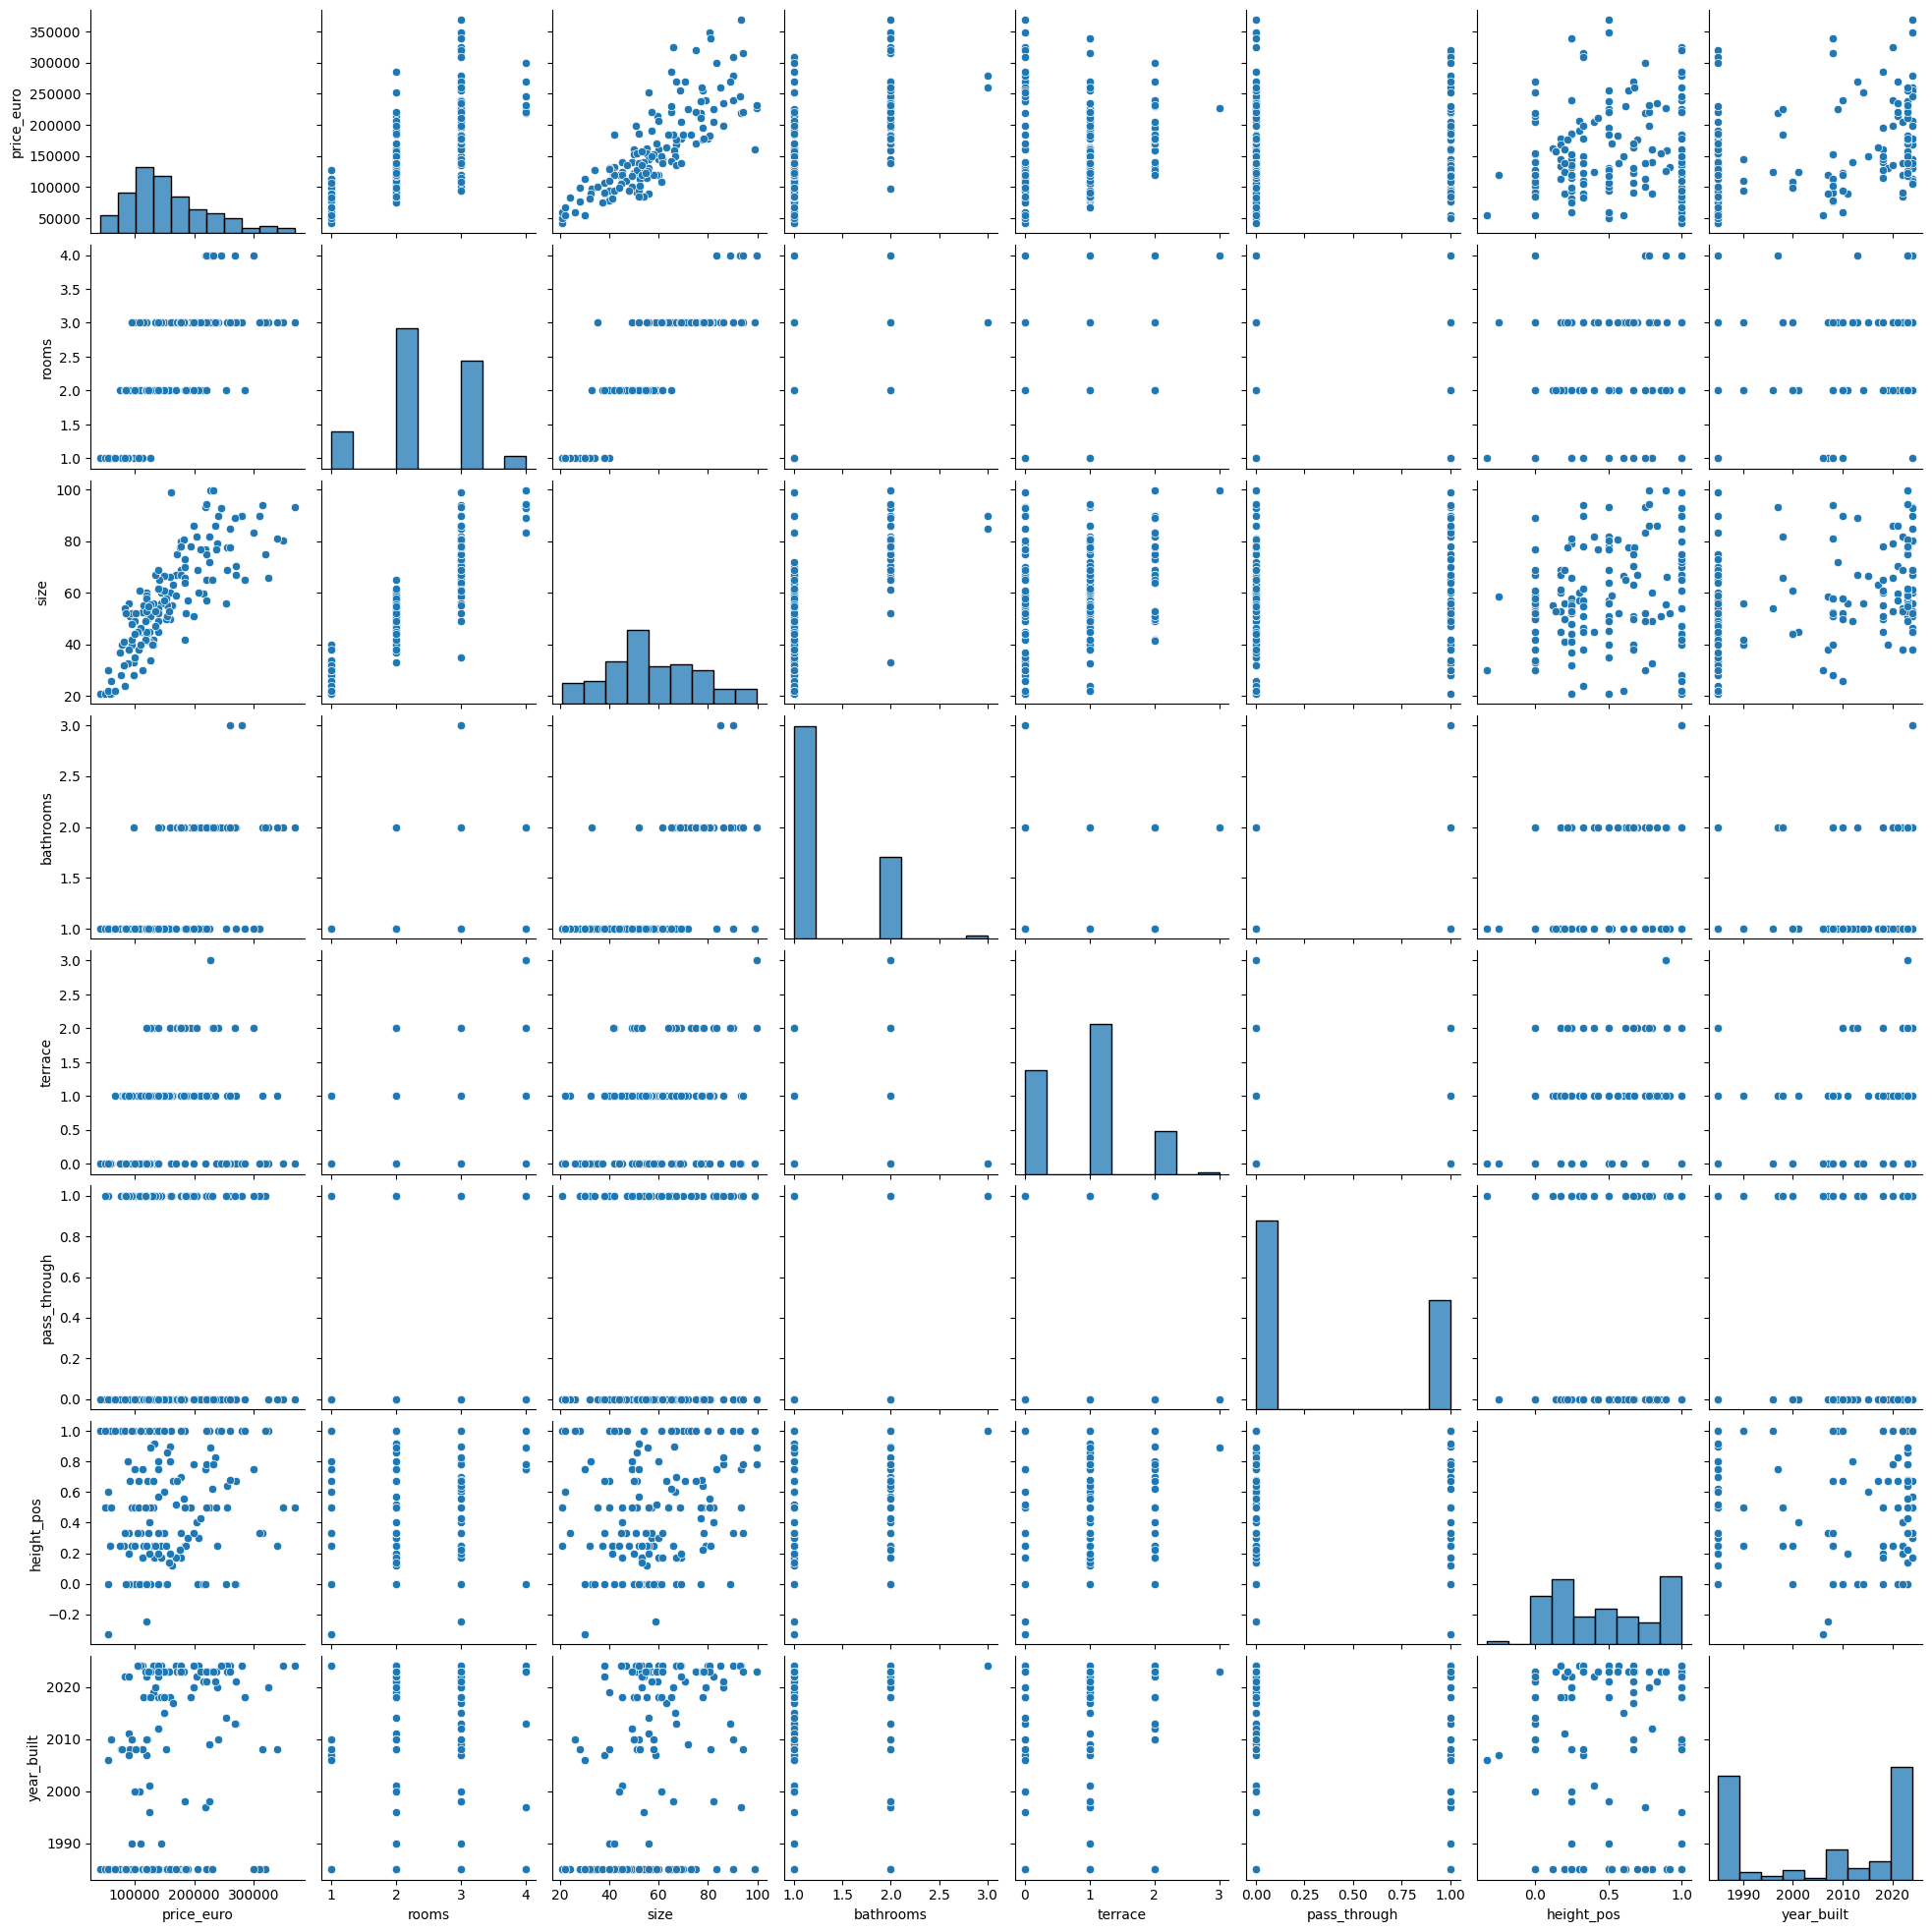

In [10]:
sns.pairplot(df)

<Axes: >

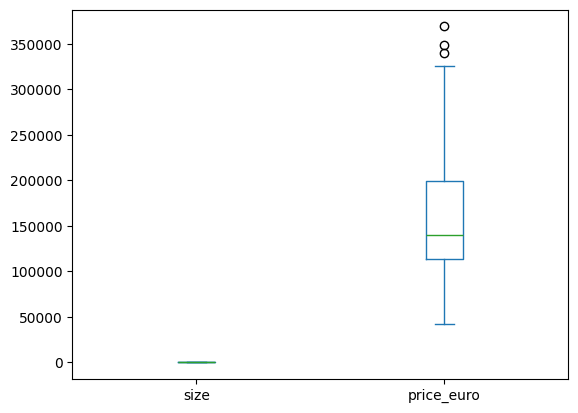

In [11]:
#check outliers

df[['size', 'price_euro']].plot(kind = 'box')

3 outliers detected in price_euro


In [12]:
# show 3 highest priced apartments
df.price_euro.sort_values(ascending = False)[-3:]

35     49900
210    49900
53     42000
Name: price_euro, dtype: int64

In [13]:
# save 3 outliers to list
top_outliers = list(df.price_euro.sort_values()[-3:].index)

# drop outliers from df
df = df.drop(top_outliers)

# check new df row count is reduced by 3 
len(df)

158

## Split Data

In [15]:
y = df.price_euro
X = df.drop(['price_euro'], axis=1)

In [18]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.1)

In [18]:
len(X_test)

16

## Modeling - Base

In [19]:
model = RandomForestRegressor(n_estimators=500,
                              max_features=3,
                              max_samples=60,
                              oob_score=True    #R^2           
                              )
rf = model.fit(X_train, y_train)

In [20]:
print(rf.oob_score_)

0.6503433661353284


## Variable Importances

<Axes: >

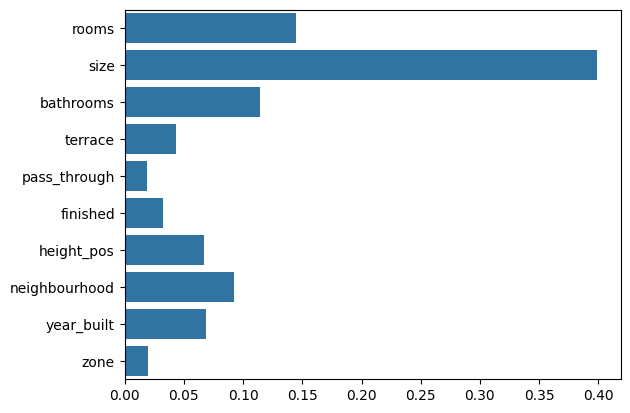

In [21]:
sns.barplot(x=rf.feature_importances_, y=rf.feature_names_in_)

In [22]:
pred_price = rf.predict(X_test)
y_test

269    127000
43      98000
270     55000
118    145000
148    139000
295    139000
193    131000
67     225000
312    176500
303    255000
86      89900
225    255000
117     81900
261     95000
56      89900
4      133725
Name: price_euro, dtype: int64

In [23]:
mae = mean_absolute_error(y_true=y_test,y_pred=pred_price)
print(f'MAE:{mae}')

mse = mean_squared_error(y_true=y_test,y_pred=pred_price)
rmse = math.sqrt(mse)
print(f'RMSE:{rmse}')

MAE:20549.862583333335
RMSE:26645.067482649505


rf model performed worst than the initial linear regression model

## Modeling 2

drop some features

## Split Data

In [24]:
y = df.price_euro
X = df[['rooms','size','bathrooms','neighbourhood','year_built']]

In [25]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.1)

In [26]:
len(X_test)

16

In [27]:
model = RandomForestRegressor(n_estimators=500,
                              max_features=3,
                              max_samples=60,
                              oob_score=True    #R^2           
                              )
rf = model.fit(X_train, y_train)

In [28]:
print(rf.oob_score_)

0.6807328796332586


## Variable Importances

<Axes: >

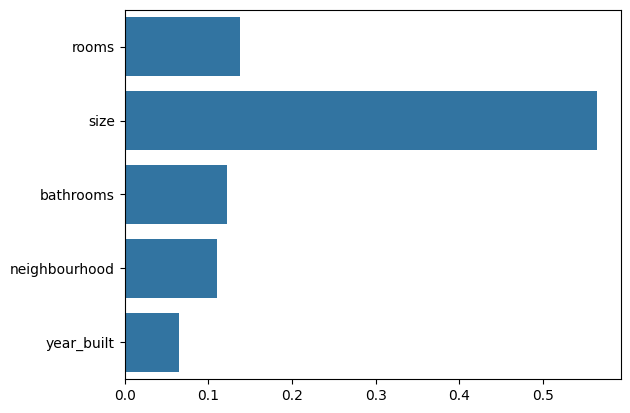

In [29]:
sns.barplot(x=rf.feature_importances_, y=rf.feature_names_in_)

In [30]:
pred_price = rf.predict(X_test)
y_test

90     190000
17     270000
111    225000
304    260000
300    253000
30     219000
66     204900
233    109392
143     75000
46     155000
266    149900
240    119000
207    139900
149    120000
191    178000
261     95000
Name: price_euro, dtype: int64

In [31]:
mae = mean_absolute_error(y_true=y_test,y_pred=pred_price)
print(f'MAE:{mae}')

mse = mean_squared_error(y_true=y_test,y_pred=pred_price)
rmse = math.sqrt(mse)
print(f'RMSE:{rmse}')

MAE:35780.28433333333
RMSE:47347.90203641361


## Modeling 3

take log of price_euro

## Split Data

In [32]:
df['price_euro_log'] = np.log(df['price_euro'])

In [33]:
y = df.price_euro_log
X = df[['rooms','size','bathrooms','neighbourhood','year_built']]

In [34]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.1)

In [35]:
len(X_test)

16

In [36]:
model = RandomForestRegressor(n_estimators=500,
                              max_features=3,
                              max_samples=60,
                              oob_score=True    #R^2           
                              )
rf = model.fit(X_train, y_train)

In [37]:
print(rf.oob_score_)

0.7127690583973044


## Variable Importances

<Axes: >

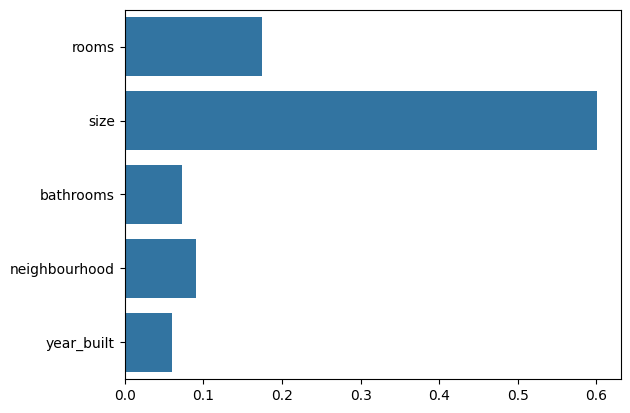

In [38]:
sns.barplot(x=rf.feature_importances_, y=rf.feature_names_in_)

In [39]:
pred_price = rf.predict(X_test)
y_test

275    11.112448
58     12.660328
40     12.301383
130    11.002100
60     12.278393
291    11.350407
260    11.338572
22     11.790557
117    11.313254
56     11.406453
178    11.970350
143    11.225243
52     11.849398
240    11.686879
2      12.088555
24     12.230765
Name: price_euro_log, dtype: float64

In [40]:
mae = mean_absolute_error(y_true=np.exp(y_test),y_pred=np.exp(pred_price))
print(f'MAE:{mae}')

mse = mean_squared_error(y_true=np.exp(y_test),y_pred=np.exp(pred_price))
rmse = math.sqrt(mse)
print(f'RMSE:{rmse}')

MAE:27900.01020651483
RMSE:34319.19457632706


Check how far of prediction is compared to true prices

<Axes: xlabel='price_euro_log', ylabel='price_euro_log'>

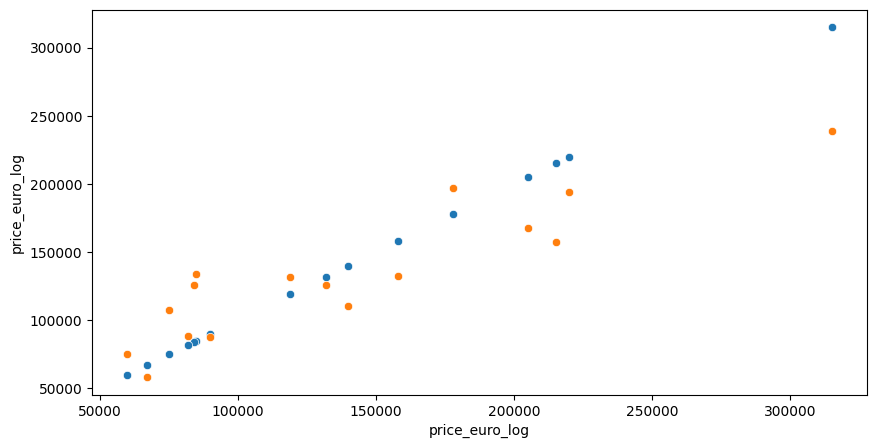

In [41]:
fix, ax = plt.subplots(figsize = (10,5))

sns.scatterplot(x = np.exp(y_test), y = np.exp(y_test), ax=ax)
sns.scatterplot(x=np.exp(y_test), y=np.exp(pred_price), ax=ax)

algorithm is under predicting for expensive apartments

In [42]:
# find data point 
df[(df['size']>90) & (df['price_euro'] <200000)]

,price_euro,rooms,size,bathrooms,terrace,pass_through,finished,height_pos,neighbourhood,year_built,zone,price_euro_log
121,161000,3,99.0,1,0,True,0,1.0,2,1985,1,11.98916


## Modeling 4

delete oulier point on row 121

drop some features

In [27]:
df.drop([121])

,price_euro,rooms,size,bathrooms,terrace,pass_through,finished,height_pos,neighbourhood,year_built,zone
0,133425,2,53.00,1,1,False,not finished,0.17,8,2024,other
1,168675,3,67.00,2,2,False,not finished,0.17,8,2024,other
2,177825,3,69.00,2,2,False,not finished,0.17,8,2024,other
3,168675,3,67.00,2,2,False,not finished,0.17,5,2024,other
4,133725,2,53.00,1,0,True,not finished,0.17,8,2024,other
...,...,...,...,...,...,...,...,...,...,...,...
310,231500,4,99.78,2,2,False,not finished,0.78,9,2023,other
311,182500,3,80.51,2,1,False,not finished,0.56,9,2023,other
312,176500,3,77.66,2,2,False,not finished,0.22,9,2023,other
313,177500,3,78.04,2,2,False,not finished,0.33,9,2023,other


## Split Data

In [28]:
y = df.price_euro
X = df[['rooms','size','bathrooms','neighbourhood','year_built']]

In [29]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [30]:
len(X_test)

8

In [31]:
model = RandomForestRegressor(n_estimators=500,
                              max_features=3,
                              max_samples=60,
                              oob_score=True    #R^2           
                              )
rf = model.fit(X_train, y_train)

In [32]:
print(rf.oob_score_)

0.6620840438121911


## Variable Importances

<Axes: >

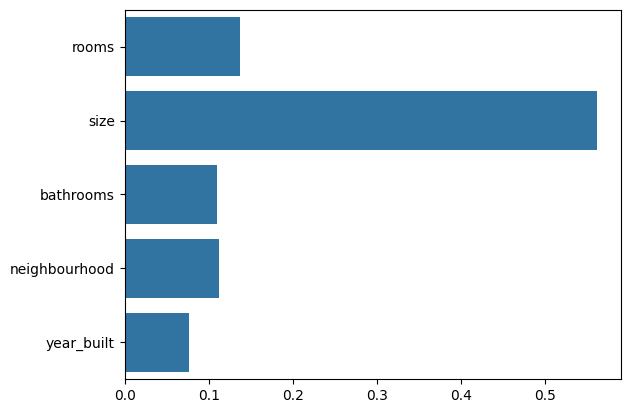

In [33]:
sns.barplot(x=rf.feature_importances_, y=rf.feature_names_in_)

In [34]:
pred_price = rf.predict(X_test)
y_test

266    149900
84     229900
272     90325
313    177500
165    153000
45     153000
179    211300
191    178000
Name: price_euro, dtype: int64

In [35]:
mae = mean_absolute_error(y_true=y_test,y_pred=pred_price)
print(f'MAE:{mae}')

mse = mean_squared_error(y_true=y_test,y_pred=pred_price)
rmse = math.sqrt(mse)
print(f'RMSE:{rmse}')

MAE:26232.8745
RMSE:31231.155549544048


Check how far of prediction is compared to true prices

<Axes: xlabel='price_euro', ylabel='price_euro'>

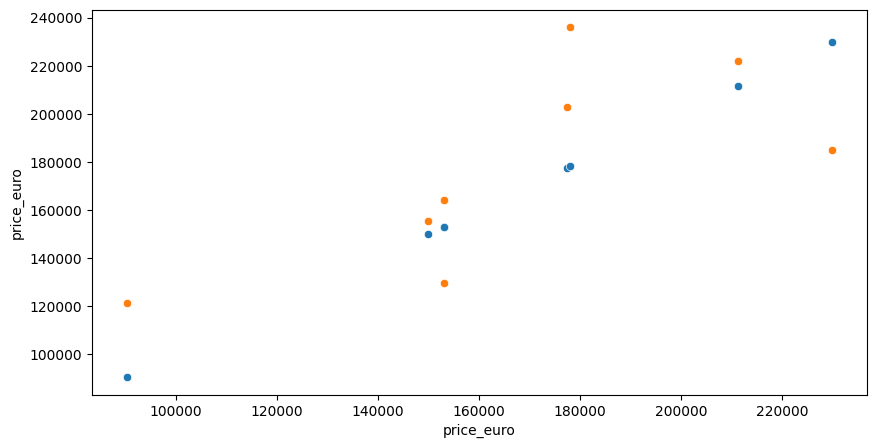

In [36]:
fix, ax = plt.subplots(figsize = (10,5))

sns.scatterplot(x = y_test, y = y_test, ax=ax)
sns.scatterplot(x=y_test, y=pred_price, ax=ax)

## Save Model

In [37]:
with open('randomForestForAptPrice.pkl','wb') as f:
    pickle.dump(rf, f)

# Setup API

## Save preprocessing steps as pickle file

In [38]:
with open('neighbourhood_encoder.pkl','wb') as f:
    pickle.dump(le, f)